In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)
og_eclipse_df = pd.read_csv('./data/eclipse-metrics-packages-2.0.csv', delimiter=";")
og_eclipse_df

,plugin,packagename,pre,post,ACD_avg,ACD_max,ACD_sum,FOUT_avg,FOUT_max,FOUT_sum,MLOC_avg,MLOC_max,MLOC_sum,NBD_avg,NBD_max,NBD_sum,NOCU,NOF_avg,NOF_max,NOF_sum,NOI_avg,NOI_max,NOI_sum,NOM_avg,NOM_max,...,NORM_VariableDeclarationFragment,NORM_VariableDeclarationStatement,NORM_WhileStatement,NORM_InstanceofExpression,NORM_LineComment,NORM_BlockComment,NORM_TagElement,NORM_TextElement,NORM_MemberRef,NORM_MethodRef,NORM_MethodRefParameter,NORM_EnhancedForStatement,NORM_EnumDeclaration,NORM_EnumConstantDeclaration,NORM_TypeParameter,NORM_ParameterizedType,NORM_QualifiedType,NORM_WildcardType,NORM_NormalAnnotation,NORM_MarkerAnnotation,NORM_SingleMemberAnnotation,NORM_MemberValuePair,NORM_AnnotationTypeDeclaration,NORM_AnnotationTypeMemberDeclaration,NORM_Modifier
0,org.eclipse.jdt.junit,org.eclipse.jdt.internal.junit.launcher,5,0,0.571429,4.0,4.0,5.980769,29.0,311.0,9.230769,55.0,480.0,1.826923,6.0,95.0,7.0,1.250000,8.0,10.0,0.000000,0.0,0.0,6.375000,18.0,...,0.019826,0.016805,0.000000,0.001322,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.017372
1,org.eclipse.jdt.junit,org.eclipse.jdt.internal.junit.runner,2,0,0.000000,0.0,0.0,4.000000,22.0,168.0,6.666667,32.0,280.0,1.357143,6.0,57.0,3.0,2.600000,11.0,13.0,0.333333,1.0,1.0,8.200000,29.0,...,0.030303,0.013699,0.000830,0.000830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.051474
2,org.eclipse.jdt.junit,org.eclipse.jdt.internal.junit.ui,9,0,1.238095,14.0,26.0,4.321267,33.0,955.0,7.027149,83.0,1553.0,1.452489,5.0,321.0,21.0,3.555556,26.0,96.0,0.095238,1.0,2.0,7.518519,52.0,...,0.026269,0.015959,0.000353,0.000918,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.034461
3,org.eclipse.jdt.junit,org.eclipse.jdt.internal.junit.util,2,0,0.555556,4.0,5.0,3.752941,80.0,319.0,6.517647,118.0,554.0,1.564706,6.0,133.0,9.0,2.090909,12.0,23.0,0.000000,0.0,0.0,4.818182,18.0,...,0.021455,0.014129,0.000174,0.003663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028606
4,org.eclipse.jdt.junit,org.eclipse.jdt.internal.junit.wizards,6,0,2.000000,5.0,18.0,6.552632,63.0,996.0,10.736842,75.0,1632.0,2.052632,8.0,312.0,9.0,4.692308,16.0,61.0,0.000000,0.0,0.0,11.076923,36.0,...,0.026956,0.018819,0.000073,0.001017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.024341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,org.eclipse.help.ui,org.eclipse.help.ui.internal.browser.hpux,0,0,0.000000,0.0,0.0,1.750000,11.0,28.0,3.437500,16.0,55.0,1.250000,3.0,20.0,2.0,0.666667,2.0,2.0,0.000000,0.0,0.0,5.000000,8.0,...,0.017787,0.005929,0.001976,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.059289
373,org.eclipse.help.ui,org.eclipse.help.ui.internal.browser.linux,0,0,0.000000,0.0,0.0,2.764706,19.0,47.0,5.705882,29.0,97.0,1.352941,3.0,23.0,2.0,0.666667,2.0,2.0,0.000000,0.0,0.0,5.333333,9.0,...,0.023936,0.007979,0.001330,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053191
374,org.eclipse.help.ui,org.eclipse.help.ui.internal.browser.solaris,0,0,0.000000,0.0,0.0,2.000000,10.0,32.0,3.500000,16.0,56.0,1.375000,3.0,22.0,2.0,0.333333,1.0,1.0,0.000000,0.0,0.0,4.666667,8.0,...,0.017274,0.007678,0.001919,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061420
375,org.eclipse.help.ui,org.eclipse.help.ui.internal.search,3,1,1.600000,5.0,8.0,6.700000,61.0,201.0,12.200000,92.0,366.0,1.733333,4.0,52.0,5.0,3.800000,7.0,19.0,0.000000,0.0,0.0,6.000000,14.0,...,0.026919,0.014623,0.000000,0.001662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.027916


In [3]:
# getting target label
y = og_eclipse_df["post"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: post, dtype: int64

In [4]:
y.describe()

count    377.000000
mean       2.432361
std        6.241702
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       88.000000
Name: post, dtype: float64

In [5]:
# getting predictor variables
x = og_eclipse_df.drop(columns=["post"]).iloc[:, 2:43]
x.head()

,pre,ACD_avg,ACD_max,ACD_sum,FOUT_avg,FOUT_max,FOUT_sum,MLOC_avg,MLOC_max,MLOC_sum,NBD_avg,NBD_max,NBD_sum,NOCU,NOF_avg,NOF_max,NOF_sum,NOI_avg,NOI_max,NOI_sum,NOM_avg,NOM_max,NOM_sum,NOT_avg,NOT_max,NOT_sum,NSF_avg,NSF_max,NSF_sum,NSM_avg,NSM_max,NSM_sum,PAR_avg,PAR_max,PAR_sum,TLOC_avg,TLOC_max,TLOC_sum,VG_avg,VG_max,VG_sum
0,5,0.571429,4.0,4.0,5.980769,29.0,311.0,9.230769,55.0,480.0,1.826923,6.0,95.0,7.0,1.250000,8.0,10.0,0.000000,0.0,0.0,6.375000,18.0,51.0,1.000000,1.0,7.0,0.500000,3.0,4.0,0.125000,1.0,1.0,1.173077,4.0,61.0,112.000000,277.0,784.0,2.576923,11.0,134.0
1,2,0.000000,0.0,0.0,4.000000,22.0,168.0,6.666667,32.0,280.0,1.357143,6.0,57.0,3.0,2.600000,11.0,13.0,0.333333,1.0,1.0,8.200000,29.0,41.0,0.666667,1.0,2.0,4.000000,16.0,20.0,0.200000,1.0,1.0,1.095238,4.0,46.0,140.000000,386.0,420.0,2.333333,15.0,98.0
2,9,1.238095,14.0,26.0,4.321267,33.0,955.0,7.027149,83.0,1553.0,1.452489,5.0,321.0,21.0,3.555556,26.0,96.0,0.095238,1.0,2.0,7.518519,52.0,203.0,0.904762,1.0,19.0,1.074074,11.0,29.0,0.666667,9.0,18.0,0.800905,4.0,177.0,116.000000,679.0,2436.0,2.045249,19.0,452.0
3,2,0.555556,4.0,5.0,3.752941,80.0,319.0,6.517647,118.0,554.0,1.564706,6.0,133.0,9.0,2.090909,12.0,23.0,0.000000,0.0,0.0,4.818182,18.0,53.0,1.000000,1.0,9.0,0.181818,1.0,2.0,2.909091,9.0,32.0,1.517647,7.0,129.0,99.444444,219.0,895.0,2.411765,32.0,205.0
4,6,2.000000,5.0,18.0,6.552632,63.0,996.0,10.736842,75.0,1632.0,2.052632,8.0,312.0,9.0,4.692308,16.0,61.0,0.000000,0.0,0.0,11.076923,36.0,144.0,1.000000,1.0,9.0,1.846154,9.0,24.0,0.615385,3.0,8.0,0.796053,4.0,121.0,253.444444,724.0,2281.0,2.809211,21.0,427.0


In [6]:
x.describe()

,pre,ACD_avg,ACD_max,ACD_sum,FOUT_avg,FOUT_max,FOUT_sum,MLOC_avg,MLOC_max,MLOC_sum,NBD_avg,NBD_max,NBD_sum,NOCU,NOF_avg,NOF_max,NOF_sum,NOI_avg,NOI_max,NOI_sum,NOM_avg,NOM_max,NOM_sum,NOT_avg,NOT_max,NOT_sum,NSF_avg,NSF_max,NSF_sum,NSM_avg,NSM_max,NSM_sum,PAR_avg,PAR_max,PAR_sum,TLOC_avg,TLOC_max,TLOC_sum,VG_avg,VG_max,VG_sum
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,11.397878,0.487768,2.639257,7.559682,3.569337,37.143236,726.572944,6.886520,72.989390,1421.830239,1.408035,4.970822,284.503979,17.848806,2.655245,12.607427,54.798408,0.172434,0.509284,2.822281,7.919620,32.379310,177.769231,0.827946,0.978780,15.034483,2.277422,21.811671,41.076923,1.181801,12.604775,21.246684,1.020060,4.957560,210.114058,117.645997,494.687003,2113.901857,2.276089,19.809019,480.114058
std,21.791585,0.914659,3.739858,16.867357,2.278178,36.675557,1722.374379,4.667409,90.803798,3634.398730,0.537000,2.323950,687.157223,22.557750,3.885536,20.484679,94.776931,0.277450,0.500578,6.726633,5.384483,37.169636,443.802545,0.277751,0.177379,21.431146,6.283659,72.670226,94.109527,3.402363,51.386834,69.903088,0.439893,3.203771,455.568578,127.328041,593.967554,4824.224327,1.327293,29.697421,1343.046313
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.800000,6.000000,6.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2.166667,16.000000,117.000000,4.405405,29.000000,217.000000,1.233333,4.000000,51.000000,6.000000,1.000000,4.000000,10.000000,0.000000,0.000000,0.000000,4.842105,13.000000,37.000000,0.785714,1.000000,3.000000,0.383333,2.000000,4.000000,0.037037,1.000000,1.000000,0.743455,3.000000,44.000000,59.700000,176.000000,421.000000,1.673913,7.000000,71.000000
50%,3.000000,0.148148,1.000000,1.000000,3.521277,29.000000,331.000000,6.627737,54.000000,677.000000,1.468227,5.000000,143.000000,11.000000,2.076923,8.000000,25.000000,0.019048,1.000000,1.000000,6.780488,22.000000,83.000000,0.980952,1.000000,10.000000,1.000000,6.000000,12.000000,0.416667,3.000000,6.000000,0.954220,4.000000,105.000000,97.153846,327.000000,1080.000000,2.211268,13.000000,228.000000
75%,12.000000,0.620690,4.000000,8.000000,4.830189,45.000000,854.000000,8.674699,88.000000,1529.000000,1.750000,6.000000,320.000000,22.000000,3.352941,14.000000,62.000000,0.214286,1.000000,3.000000,9.500000,40.000000,209.000000,1.000000,1.000000,18.000000,2.000000,14.000000,33.000000,1.090909,10.000000,18.000000,1.173077,6.000000,224.000000,140.000000,595.000000,2305.000000,2.674699,22.000000,535.000000
max,179.000000,9.000000,24.000000,150.000000,20.500000,310.000000,28201.000000,39.500000,994.000000,60190.000000,3.000000,17.000000,11611.000000,242.000000,63.250000,251.000000,994.000000,1.000000,1.000000,76.000000,42.000000,297.000000,7669.000000,1.111111,2.000000,241.000000,94.333333,1049.000000,1119.000000,56.714286,596.000000,938.000000,3.000000,28.000000,7059.000000,1872.000000,5207.000000,79474.000000,12.460000,310.000000,23255.000000


## Data Analysis

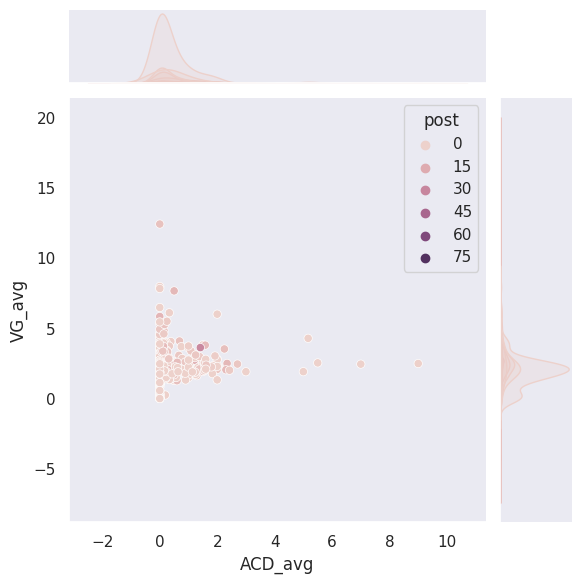

In [8]:
sns.jointplot(data=og_eclipse_df, x="ACD_avg", y="VG_avg", hue="post")

In [ ]:
sns.pairplot(data=og_eclipse_df, hue="post")